# Resnet Week 4 Prototype
Data: PIC_NUMBER = 25, THRESHOLD = 100

In [3]:
# first, unzip the uploaded file
import os, os.path
import zipfile
path_to_zip_file = 'data/art/small_25_100_data.zip' 
directory_to_extract_to = 'data/art'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [8]:
# now, find all the classes real quick
import os

data_dir = 'data/art/small_25_100_data'
classes = [x[0].replace(data_dir+"/",'') for x in os.walk(data_dir)]

print(classes)
# for mine the first and last part of the list were weird lol
# classes = classes[1:-1]
# for yours probably (hopefully) only the first is weird, because it is the name of the folder itself
classes = classes[1:]
print(classes)

['data/art/small_25_100_data', 'Abstract Art', 'Abstract Expressionism', 'Art Informel', 'Art Nouveau (Modern)', 'Baroque', 'Cubism', 'Early Renaissance', 'Expressionism', 'High Renaissance', 'Impressionism', 'Magic Realism', 'Mannerism (Late Renaissance)', 'Naïve Art (Primitivism)', 'Neoclassicism', 'Northern Renaissance', 'Post-Impressionism', 'Realism', 'Rococo', 'Romanticism', 'Surrealism', 'Symbolism', 'Ukiyo-e', '.ipynb_checkpoints']
['Abstract Art', 'Abstract Expressionism', 'Art Informel', 'Art Nouveau (Modern)', 'Baroque', 'Cubism', 'Early Renaissance', 'Expressionism', 'High Renaissance', 'Impressionism', 'Magic Realism', 'Mannerism (Late Renaissance)', 'Naïve Art (Primitivism)', 'Neoclassicism', 'Northern Renaissance', 'Post-Impressionism', 'Realism', 'Rococo', 'Romanticism', 'Surrealism', 'Symbolism', 'Ukiyo-e']


In [9]:
from fastai.vision import *

# remove bad images
for c in classes:
    print(c)
    verify_images(data_dir+"/"+c, delete=True, max_size = 500)


Abstract Art


Abstract Expressionism


Art Informel


Art Nouveau (Modern)


Baroque


Cubism


tuple index out of range
Early Renaissance


Expressionism


High Renaissance


Impressionism


Magic Realism


Mannerism (Late Renaissance)


Naïve Art (Primitivism)


Neoclassicism


Northern Renaissance


Post-Impressionism


Realism


Rococo


Romanticism


Surrealism


Symbolism


Ukiyo-e


In [13]:
# create the data bunch!

import numpy
np.random.seed(42)
data = ImageDataBunch.from_folder(data_dir, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=16, num_workers=4).normalize(imagenet_stats)


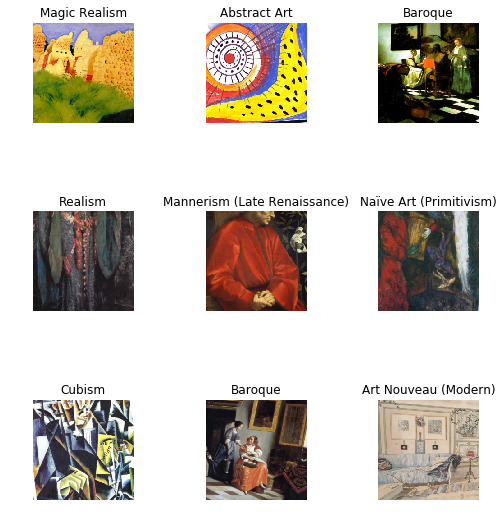

In [14]:
data.show_batch(rows=3, figsize=(7,8))


In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['Abstract Art',
  'Abstract Expressionism',
  'Art Informel',
  'Art Nouveau (Modern)',
  'Baroque',
  'Cubism',
  'Early Renaissance',
  'Expressionism',
  'High Renaissance',
  'Impressionism',
  'Magic Realism',
  'Mannerism (Late Renaissance)',
  'Naïve Art (Primitivism)',
  'Neoclassicism',
  'Northern Renaissance',
  'Post-Impressionism',
  'Realism',
  'Rococo',
  'Romanticism',
  'Surrealism',
  'Symbolism',
  'Ukiyo-e'],
 22,
 440,
 109)

In [16]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [17]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,4.264234,3.842554,0.798165,00:13
1,3.118527,2.975594,0.706422,00:08
2,2.291210,2.694491,0.715596,00:08
3,1.770783,2.620864,0.724771,00:08


In [18]:
learn.save('stage-1')

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

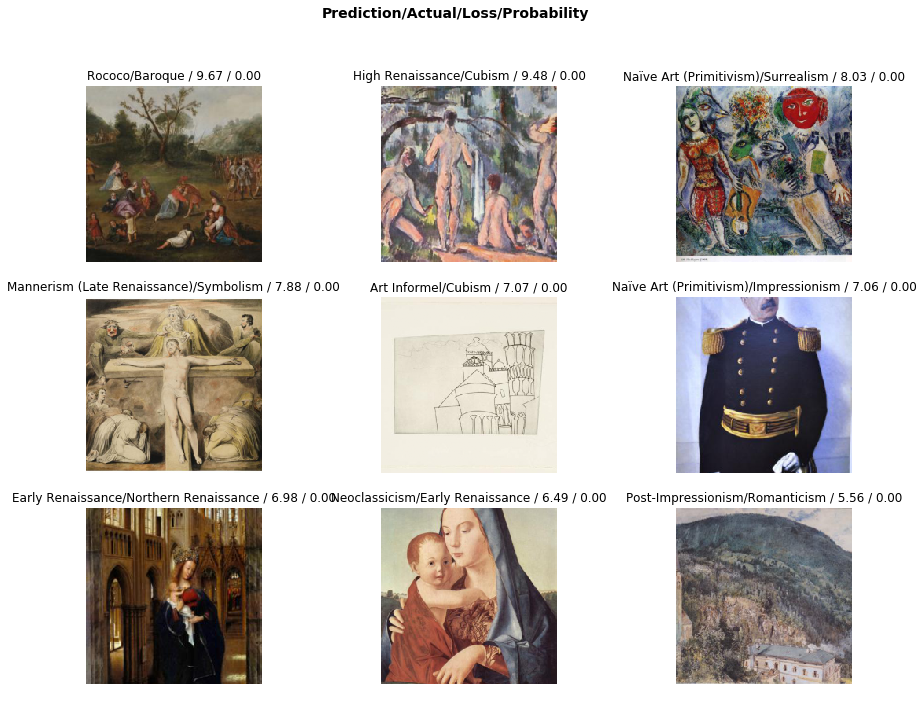

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

In [21]:
interp.most_confused(min_val=2)

[('Abstract Art', 'Abstract Expressionism', 2),
 ('Abstract Art', 'Magic Realism', 2),
 ('Art Informel', 'Abstract Expressionism', 2),
 ('Art Nouveau (Modern)', 'Early Renaissance', 2),
 ('Art Nouveau (Modern)', 'Expressionism', 2),
 ('Cubism', 'Art Informel', 2),
 ('Cubism', 'High Renaissance', 2),
 ('Early Renaissance', 'High Renaissance', 2),
 ('Early Renaissance', 'Mannerism (Late Renaissance)', 2),
 ('High Renaissance', 'Mannerism (Late Renaissance)', 2),
 ('Northern Renaissance', 'Early Renaissance', 2),
 ('Post-Impressionism', 'Impressionism', 2),
 ('Symbolism', 'Northern Renaissance', 2),
 ('Symbolism', 'Post-Impressionism', 2)]

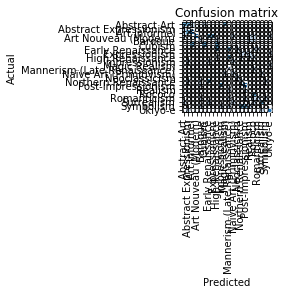

In [22]:
interp.plot_confusion_matrix()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


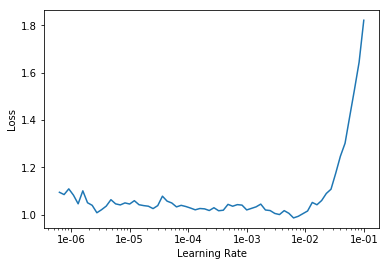

In [23]:
# Improving the Model
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.unfreeze()

In [25]:
learn.fit_one_cycle(4,1.5e-2)

epoch,train_loss,valid_loss,error_rate,time
0,4.304018,6242027.500000,0.990826,00:12
1,4.799318,256.248810,0.954128,00:11
2,4.767992,6.054813,0.944954,00:11
3,4.429911,4.486261,0.926606,00:11


In [26]:
learn.save('stage-2')
